<a href="https://colab.research.google.com/github/jaeyoonjeong9024/4weeks/blob/main/wine_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
# 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [39]:
# 데이터 읽기
df = pd.read_csv('/content/winequality-white.csv', sep=';')

print(f"데이터: {df.shape}")
print(df.head())
print(f"\n품질 분포:\n{df['quality'].value_counts().sort_index()}")

데이터: (4898, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2   

In [40]:
# 데이터 분리
X = df.drop(columns=['quality'])
y = df['quality']

In [41]:
# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
# 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [43]:
# 모델 정의
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

In [44]:
# 모델 학습
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [45]:
# 정확도 평가
models = {'KNN': knn, 'Decision Tree': dt, 'Random Forest': rf, 'Logistic Regression': lr}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name}: {accuracy:.4f}")

KNN: 0.5490
Decision Tree: 0.6071
Random Forest: 0.6898
Logistic Regression: 0.5306


In [28]:
#정확도평가
models = {'KNN': knn, 'Decision Tree': dt, 'Random Forest': rf, 'Logistic Regression': lr}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name}: {accuracy:.4f}")

KNN: 0.5485
Decision Tree: 0.5892
Random Forest: 0.6677
Logistic Regression: 0.5362


In [46]:
# Logistic Regression 계수
print("Logistic Regression - Weight와 Bias\n")

for class_idx in range(len(lr.classes_)):
    print(f"클래스 {lr.classes_[class_idx]}:")
    for i, feature in enumerate(X.columns):
        print(f"  {feature}: {lr.coef_[class_idx][i]:.4f}")
    print(f"  Bias: {lr.intercept_[class_idx]:.4f}\n")

Logistic Regression - Weight와 Bias

클래스 3:
  fixed acidity: 0.7918
  volatile acidity: 0.5261
  citric acid: -0.0062
  residual sugar: -0.3486
  chlorides: 0.5032
  free sulfur dioxide: 0.4731
  total sulfur dioxide: -0.2189
  density: -0.0940
  pH: 0.2690
  sulphates: -0.3365
  alcohol: -0.4378
  Bias: -2.4432

클래스 4:
  fixed acidity: -0.3517
  volatile acidity: 0.6364
  citric acid: 0.0096
  residual sugar: -1.2336
  chlorides: 0.2340
  free sulfur dioxide: -0.8017
  total sulfur dioxide: -0.0417
  density: 1.2350
  pH: -0.4346
  sulphates: -0.0895
  alcohol: -0.5844
  Bias: -0.1569

클래스 5:
  fixed acidity: -0.4874
  volatile acidity: 0.2602
  citric acid: 0.0078
  residual sugar: -0.5109
  chlorides: 0.2099
  free sulfur dioxide: -0.2446
  total sulfur dioxide: 0.2087
  density: 0.6641
  pH: -0.4855
  sulphates: -0.0777
  alcohol: -0.8845
  Bias: 2.5193

클래스 6:
  fixed acidity: -0.6126
  volatile acidity: -0.3367
  citric acid: 0.0145
  residual sugar: -0.2571
  chlorides: 0.2664
  

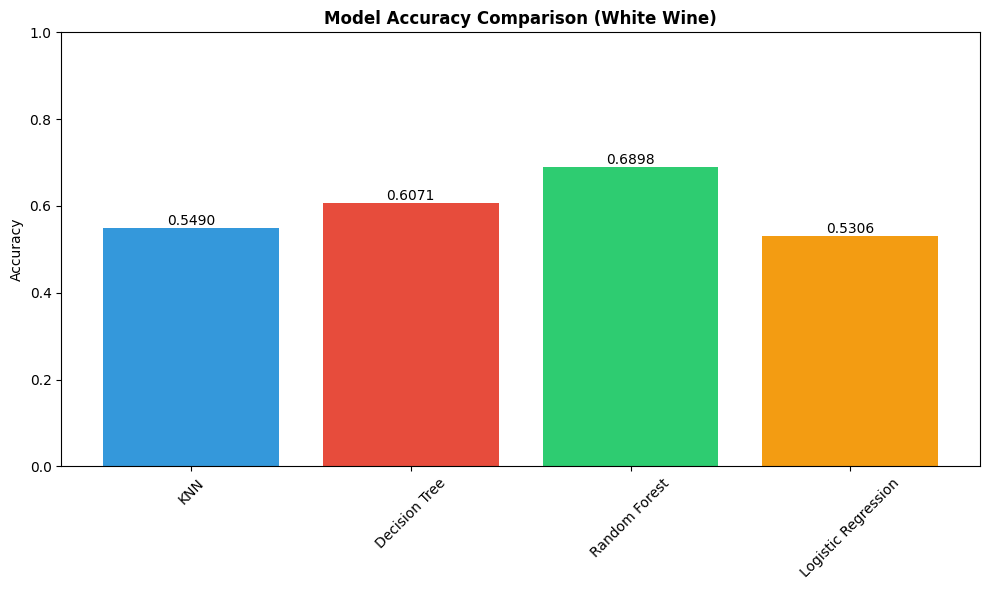

In [47]:
# 정확도 비교 시각화
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])
plt.title('Model Accuracy Comparison (White Wine)', fontweight='bold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

for i, (name, acc) in enumerate(results.items()):
    plt.text(i, acc, f'{acc:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

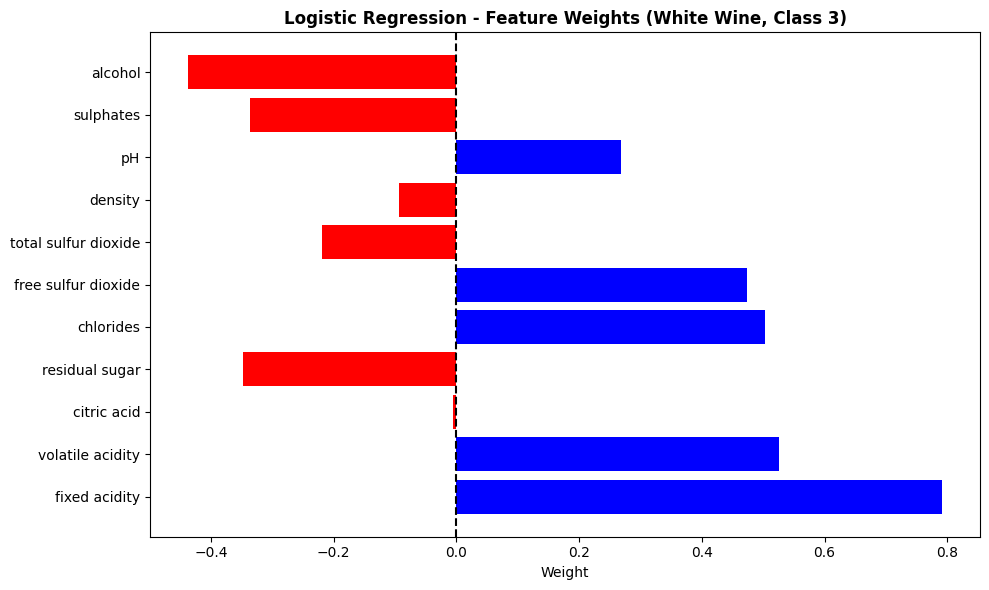

In [48]:
# Logistic Regression 계수 시각화
plt.figure(figsize=(10, 6))

weights = lr.coef_[0]
colors = ['red' if w < 0 else 'blue' for w in weights]

plt.barh(X.columns, weights, color=colors)
plt.xlabel('Weight')
plt.title('Logistic Regression - Feature Weights (White Wine, Class 3)', fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

In [49]:
# Random Forest Feature Importance
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print(importance)

                 feature  importance
10               alcohol    0.113154
7                density    0.106380
1       volatile acidity    0.102023
5    free sulfur dioxide    0.094622
6   total sulfur dioxide    0.091436
3         residual sugar    0.089036
8                     pH    0.084588
4              chlorides    0.082693
2            citric acid    0.080775
9              sulphates    0.078706
0          fixed acidity    0.076586


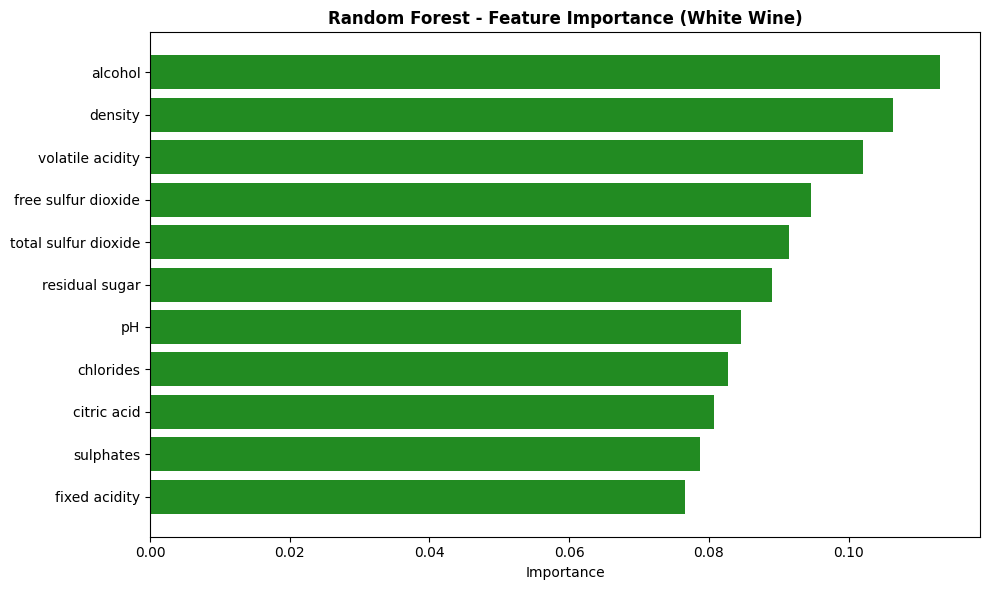

In [50]:
# Feature Importance 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance['feature'], importance['importance'], color='forestgreen')
plt.xlabel('Importance')
plt.title('Random Forest - Feature Importance (White Wine)', fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

클래스별 정확도 (White Wine)

KNN:
  클래스 3: 0.2000
  클래스 4: 0.2000
  클래스 5: 0.5704
  클래스 6: 0.6366
  클래스 7: 0.4583
  클래스 8: 0.0857
  전체: 0.5490

Decision Tree:
  클래스 3: 0.0000
  클래스 4: 0.3200
  클래스 5: 0.6426
  클래스 6: 0.6273
  클래스 7: 0.5781
  클래스 8: 0.5143
  전체: 0.6071

Random Forest:
  클래스 3: 0.0000
  클래스 4: 0.2000
  클래스 5: 0.6942
  클래스 6: 0.7894
  클래스 7: 0.5833
  클래스 8: 0.4571
  전체: 0.6898

Logistic Regression:
  클래스 3: 0.0000
  클래스 4: 0.0400
  클래스 5: 0.5189
  클래스 6: 0.7454
  클래스 7: 0.2396
  클래스 8: 0.0000
  전체: 0.5306


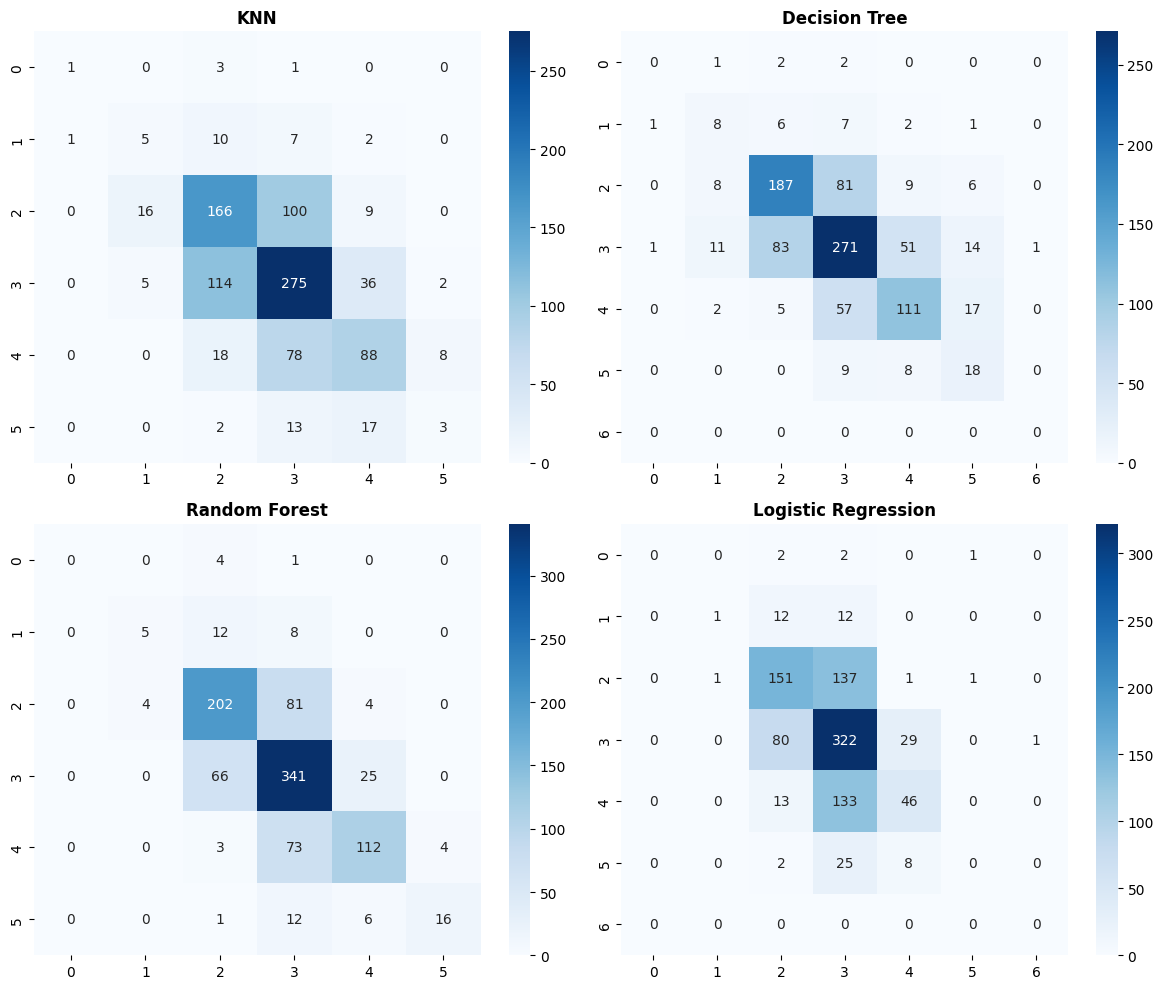

In [51]:
# 혼동 행렬 및 수치 비교
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

print("="*50)
print("클래스별 정확도 (White Wine)")
print("="*50)

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(name, fontweight='bold')

    # 클래스별 정확도
    print(f"\n{name}:")
    class_acc = [cm[i][i]/cm[i].sum() for i in range(len(cm)) if cm[i].sum()>0]
    for i, acc in enumerate(class_acc):
        print(f"  클래스 {sorted(y.unique())[i]}: {acc:.4f}")
    print(f"  전체: {results[name]:.4f}")

plt.tight_layout()
plt.show()

# Colab 시작 페이지

## Gemini API 살펴보기
Gemini API를 사용하면 Google DeepMind에서 만든 Gemini 모델에 액세스할 수 있습니다. Gemini 모델은 처음부터 멀티모달로 빌드되므로 텍스트, 이미지, 코드, 오디오 등 다양한 종류의 콘텐츠에서 원활한 추론이 가능합니다.

**시작하는 방법**
*  <a href="https://aistudio.google.com/">Google AI Studio</a>로 이동하여 Google 계정으로 로그인합니다.
*  <a href="https://aistudio.google.com/app/apikey">API 키를 만듭니다</a>.
* <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb">Python</a>용 빠른 시작을 사용하거나 <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>을 사용하여 REST API를 호출합니다.

**Gemini의 고급 기능 살펴보기**
*  반복적인 방식으로 텍스트와 이미지를 혼합하면서 Gemini <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Image-out.ipynb">멀티모달 출력</a>을 자유롭게 사용해 보세요.
*  <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_LiveAPI.ipynb">멀티모달 Live API</a>를 살펴보세요&#40;<a href="https://aistudio.google.com/live">여기</a>에서 데모 참고&#41;.
*  Gemini를 사용하여 <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Spatial_understanding.ipynb&quot;">이미지를 분석하고 사진에 포함된 항목을 감지</a>하는 방법을 알아보세요. <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Spatial_understanding_3d.ipynb">3D 버전</a>도 있습니다.
*  내적 사고를 통해 복잡한 작업을 해결할 수 있는 <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb">Gemini 사고 모델</a>의 강력한 기능을 활용하세요.
      
**복잡한 사용 사례 살펴보기**
*  <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Search_grounding_for_research_report.ipynb">Gemini 그라운딩 기능</a>을 사용하여 모델이 인터넷에서 찾은 내용을 바탕으로 회사에 대한 보고서를 작성하세요.
*  <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Pdf_structured_outputs_on_invoices_and_forms.ipynb">PDF에서 인보이스 및 양식 데이터</a>를 체계적인 방식으로 추출하세요.
*  Gemini의 커다란 컨텍스트 윈도우 및 Imagen을 사용하여 <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Book_illustration.ipynb">책의 전체 내용을 기반으로 한 일러스트</a>를 생성하세요.

자세한 내용은 <a href="https://github.com/google-gemini/cookbook">Gemini 설명서</a>를 확인하거나 <a href="https://ai.google.dev/docs/">Gemini API 문서</a>를 참고하세요.


이제 Colab에서 <a href="https://gemini.google.com">Gemini</a> 기반의 AI 기능을 사용할 수 있습니다. 아래 동영상에서 Python 초보자부터 숙련자까지 AI 기능을 사용하는 방법에 대한 정보를 확인하세요.

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  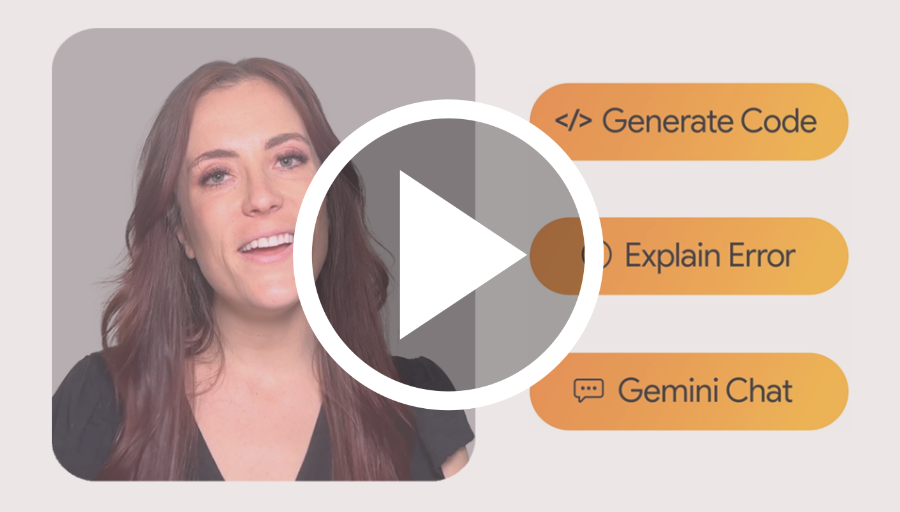
  </a>
</center>

<div class="markdown-google-sans">
  <h2>Colab이란?</h2>
</div>

Colaboratory&#40;줄여서 'Colab'이라고 함&#41;을 통해 브라우저 내에서 Python 스크립트를 작성하고 실행할 수 있습니다.
- 구성이 필요하지 않음
- 무료로 GPU 사용
- 간편한 공유

<strong>학생</strong>이든, <strong>데이터 과학자</strong>든, <strong>AI 연구원</strong>이든 Colab으로 업무를 더욱 간편하게 처리할 수 있습니다. <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colab 소개 영상</a> 또는 <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y">Colab에서 놓치기 쉬운 기능</a>을 시청하여 자세한 내용을 확인하거나 아래에서 바로 시작해 보세요.

<div class="markdown-google-sans">

## <strong>시작하기</strong>
</div>

지금 읽고 계신 문서는 정적 웹페이지가 아니라 코드를 작성하고 실행할 수 있는 대화형 환경인 <strong>Colab 메모장</strong>입니다.

예를 들어 다음은 값을 계산하여 변수로 저장하고 결과를 출력하는 간단한 Python 스크립트가 포함된 <strong>코드 셀</strong>입니다.

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

위 셀의 코드를 실행하려면 셀을 클릭하여 선택한 후 코드 왼쪽의 실행 버튼을 누르거나 단축키 'Command/Ctrl+Enter'를 사용하세요. 셀을 클릭하면 코드 수정을 바로 시작할 수 있습니다.

특정 셀에서 정의한 변수를 나중에 다른 셀에서 사용할 수 있습니다.

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab 메모장을 사용하면 <strong>실행 코드</strong>와 <strong>서식 있는 텍스트</strong>를 <strong>이미지</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> 등과 함께 하나의 문서로 통합할 수 있습니다. Colab 메모장을 만들면 Google Drive 계정에 저장됩니다. Colab 메모장을 간편하게 공유하여 동료나 친구들이 댓글을 달거나 수정하도록 할 수 있습니다. 자세히 알아보려면 <a href="/notebooks/basic_features_overview.ipynb">Colab 개요</a>를 참조하세요. 새 Colab 메모장을 만들려면 위의 파일 메뉴를 사용하거나 다음 링크로 이동하세요. <a href="http://colab.research.google.com#create=true">새 Colab 메모장 만들기</a>

Colab 메모장은 Colab에서 호스팅하는 Jupyter 메모장입니다. Jupyter 프로젝트에 관해 자세히 알아보려면 <a href="https://www.jupyter.org">jupyter.org</a>를 참조하세요.

<div class="markdown-google-sans">

## 데이터 과학
</div>

Colab을 통해 인기 있는 Python 라이브러리를 최대한 활용하여 데이터를 분석하고 시각화할 수 있습니다. 아래 코드 셀에서는 <strong>Numpy</strong>를 사용하여 임의의 데이터를 생성하고 <strong>매트플롯립</strong>으로 이를 시각화합니다. 셀을 클릭하면 코드 수정을 바로 시작할 수 있습니다.

Google Drive 계정에서 스프레드시트를 비롯한 데이터를 Colab 메모장으로 가져오거나 GitHub 등의 여러 다른 소스에서 데이터를 가져올 수 있습니다. Colab을 데이터 과학에 활용하는 방법과 데이터 가져오기에 관해 자세히 알아보려면 <a href="#working-with-data">데이터 사용하기</a> 아래 링크를 참조하세요.

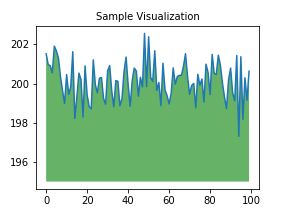

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab 노트북은 Google 클라우드 서버에서 코드를 실행하므로 사용 중인 컴퓨터 성능과 관계없이 <a href="#using-accelerated-hardware">GPU 및 TPU</a>를 포함한 Google 하드웨어 성능을 활용할 수 있습니다. 브라우저만 있으면 사용 가능합니다.

예를 들어 <strong>Pandas</strong> 코드의 실행이 완료되기를 기다리고 있는데 더 빠르게 실행하고 싶다면 GPU 런타임으로 전환하고 코드를 변경하지 않고도 가속할 수 있는 <a href="https://rapids.ai/cudf-pandas">RAPIDS cuDF</a>와 같은 라이브러리를 사용할 수 있습니다.

Colab에서 Pandas를 가속하는 방법을 자세히 알아보려면 <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb">10분 가이드</a> 또는 <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb">미국 주식 시장 데이터 분석 데모</a>를 참고하세요.

<div class="markdown-google-sans">

## 머신러닝
</div>

Colab을 사용하면 <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">코드 몇 줄만으로</a> 이미지 데이터 세트를 가져오고, 이 데이터 세트로 이미지 분류기를 학습시키며, 모델을 평가할 수 있습니다.

Colab은 다음과 같은 분야의 머신러닝 커뮤니티에서 널리 쓰이고 있습니다.
- TensorFlow 시작하기
- 신경망 개발 및 학습시키기
- TPU로 실험하기
- AI 연구 보급하기
- 튜토리얼 만들기

머신러닝 적용 사례를 보여 주는 Colab 메모장 샘플을 확인하려면 아래 <a href="#machine-learning-examples">머신러닝 예시</a>를 참조하세요.

<div class="markdown-google-sans">

## 추가 리소스

### Colab에서 메모장 사용하기

</div>

- [Colab 개요](/notebooks/basic_features_overview.ipynb)
- [Markdown 가이드](/notebooks/markdown_guide.ipynb)
- [라이브러리 가져오기 및 종속 항목 설치하기](/notebooks/snippets/importing_libraries.ipynb)
- [GitHub에서 노트 저장 및 로드하기](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [대화형 양식](/notebooks/forms.ipynb)
- [대화형 위젯](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### 데이터로 작업하기
</div>

- [데이터 로드: 드라이브, 스프레드시트, Google Cloud Storage](/notebooks/io.ipynb)
- [차트: 데이터 시각화하기](/notebooks/charts.ipynb)
- [BigQuery 시작하기](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### 머신러닝

<div>

Google의 온라인 머신러닝 과정을 비롯해 머신러닝과 관련된 일부 노트북입니다. 자세한 내용은 <a href="https://developers.google.com/machine-learning/crash-course/">전체 과정 웹사이트</a>를 참고하세요.
- [Pandas DataFrame 소개](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Pandas를 가속화하는 RAPIDS cuDF 소개](https://nvda.ws/rapids-cudf)
- [cuML의 가속기 모드 시작하기](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cuml_sklearn_colab_demo.ipynb)
- [합성 데이터를 사용하는 tf.keras 선형 회귀](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### 가속 하드웨어 사용하기
</div>

- [GPU를 사용한 TensorFlow](/notebooks/gpu.ipynb)
- [Colab의 TPU](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### 추천 예시

</div>

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">이미지 분류기 재훈련</a>: 사전에 훈련된 이미지 분류기를 기반으로 꽃을 분류하기 위한 Keras 모델을 구축합니다.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">텍스트 분류</a>: IMDB 영화 리뷰를 <em>긍정적인 리뷰</em> 또는 <em>부정적인 리뷰</em>로 분류합니다.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">스타일 트랜스퍼</a>: 딥 러닝을 사용하여 이미지 간에 스타일을 전이시킵니다.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: 머신러닝 모델을 사용하여 SQuAD 데이터 세트의 질문에 답변합니다.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">동영상 보간 유형</a>: 동영상에서 첫 프레임과 마지막 프레임 사이에 발생한 내용을 예측합니다.
